In [340]:
%matplotlib inline  

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 
from jupyterthemes import jtplot
jtplot.style()

# for view all of datas
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 150)

df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv',index_col='Id')

In [341]:
# check categorical value / numeric value
#df_raw.nunique()[map(lambda x : x<50, df_raw.nunique())]

pd.DataFrame({'unique count':df.nunique(),'null count':df.isnull().sum()})

,unique count,null count
MSSubClass,15,0
MSZoning,5,0
LotFrontage,110,259
LotArea,1073,0
Street,2,0
Alley,2,1369
LotShape,4,0
LandContour,4,0
Utilities,2,0
LotConfig,5,0


In [342]:
list(map(lambda x:{x: df[x].unique()}, df.columns))

[{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
         180,  40])},
 {'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)},
 {'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
          91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
          74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
          81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
          77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
          92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
          67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
          87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
          38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
         114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
          46.])},
 {'LotArea': array([ 8450,  9600, 

In [343]:
print(df.columns[41:57]) # kisoo

Index(['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu'],
      dtype='object')


In [344]:
df_3 = pd.concat([df.iloc[:,79:80], df.iloc[:,41:57]], axis=1)

df_3.FireplaceQu = df_3.FireplaceQu.fillna('NA') # without Fireplace, there is no FireplaceQu.
df_3.Electrical = df_3.Electrical.fillna('SBrkr') # since Utility column, there is electricity obviously, so it filled with most common Electrical type 'SBrkr'

df_3_c = df_3.loc[:,['SalePrice','Electrical','KitchenQual','Functional','FireplaceQu']]
df_3_n = df_3.loc[:,['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces']]
#df_3.isnull().sum()

In [345]:
df_3.describe()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014
std,79442.502883,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666
min,34900.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,129975.000000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000
50%,163000.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000
75%,214000.000000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000
max,755000.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000


In [346]:
# numeric variables

df_3_n.nunique()

SalePrice       663
1stFlrSF        753
2ndFlrSF        417
LowQualFinSF     24
GrLivArea       861
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
TotRmsAbvGrd     12
Fireplaces        4
dtype: int64

In [347]:
df_3_n.corr()

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
SalePrice,1.000000,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929
1stFlrSF,0.605852,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531
2ndFlrSF,0.319334,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561
LowQualFinSF,-0.025606,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272
GrLivArea,0.708624,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679
BsmtFullBath,0.227122,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275,0.137928
BsmtHalfBath,-0.016844,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836,0.028976
FullBath,0.560664,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671
HalfBath,0.284108,-0.119916,0.609707,-0.027080,0.415772,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415,0.203649
BedroomAbvGr,0.168213,0.127401,0.502901,0.105607,0.521270,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620,0.107570


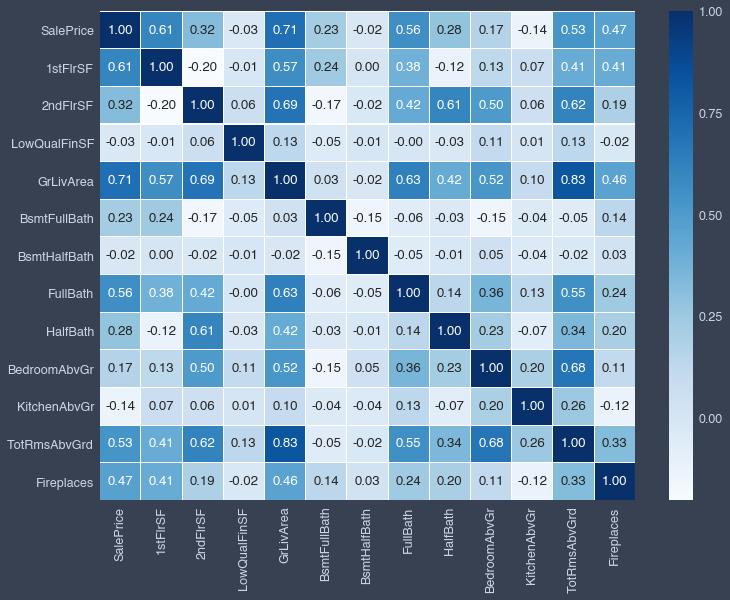

In [348]:
plt.figure(figsize=(12,9))
sns.heatmap(data = df_3_n.corr(), annot=True, fmt = '.2f', linewidths=.1, cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f960537bf60>,
      dtype=object)

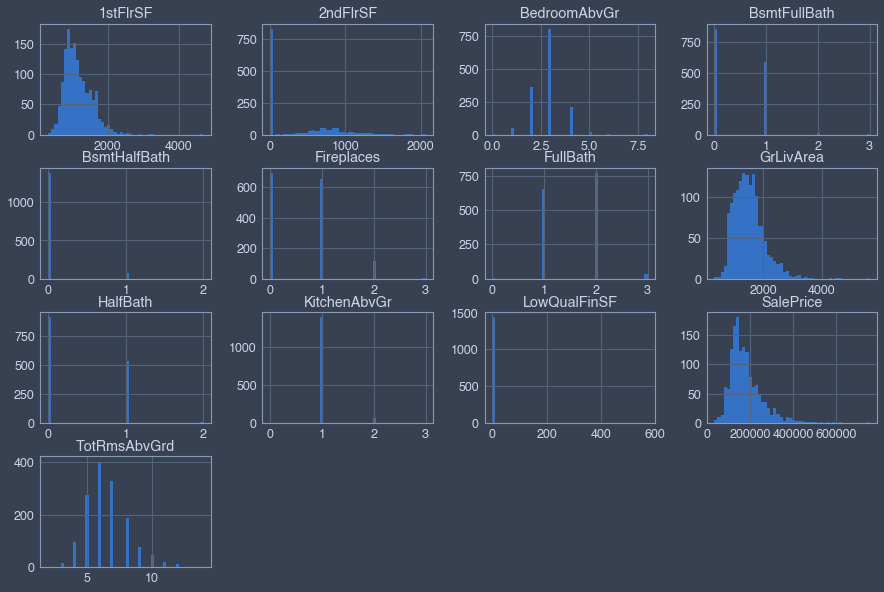

In [349]:
df_3_n.hist(bins=50, figsize=(15,10))

In [350]:
# normalization
scaler = StandardScaler()
scaler.fit(df_3_n.iloc[:,1:])
df_3_n_scaled = scaler.transform(df_3_n.iloc[:,1:])
df_3_n_scaled = pd.DataFrame(df_3_n_scaled)
df_3_n_scaled['Id'] = range(1,1461)
df_3_n_scaled.set_index('Id', inplace=True)
df_3_n_scaled = pd.concat([df_3_n.iloc[:,0:1], df_3_n_scaled], axis=1)
df_3_n_scaled.columns = df_3_n.columns
df_3_n_scaled

# log transformation cox-box

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
Id,,,,,,,,,,,,,
1,208500,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226
2,181500,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495
3,223500,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495
4,140000,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495
5,250000,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495
6,143000,-0.948691,0.501875,-0.120242,-0.292145,1.107810,-0.241061,-1.026041,1.227585,-2.288708,-0.211454,-0.934130,-0.951226
7,307000,1.374993,-0.795163,-0.120242,0.339875,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,0.600495
8,200000,-0.143941,1.457466,-0.120242,1.093729,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,2.152216
9,129900,-0.363889,0.928110,-0.120242,0.492168,-0.819964,-0.241061,0.789741,-0.761621,-1.062465,4.328579,0.912210,2.152216


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96262882b0>,
      dtype=object)

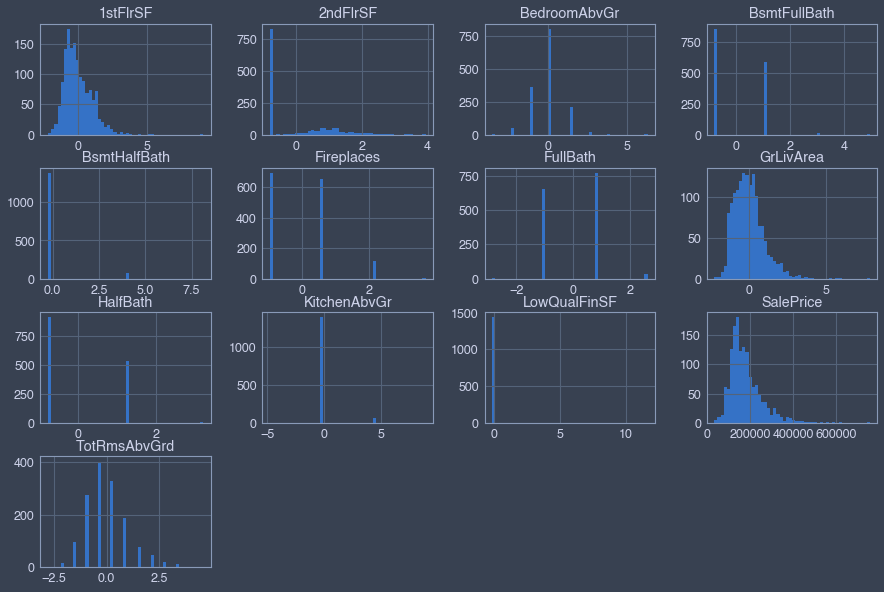

In [351]:
df_3_n_scaled.hist(bins=50, figsize=(15,10))

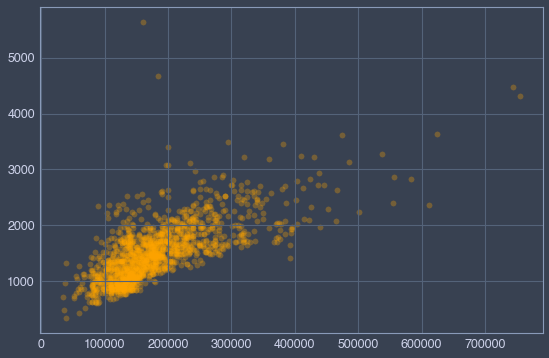

In [352]:
plt.figure(figsize=(9, 6))
#plt.scatter(df_3_n['SalePrice'], df_3_n_scaled[:,4], alpha='0.3', color='orange', cmap='viridis')
plt.scatter(df_3_n['SalePrice'], df_3_n['GrLivArea'], alpha='0.3', color='orange', cmap='viridis')

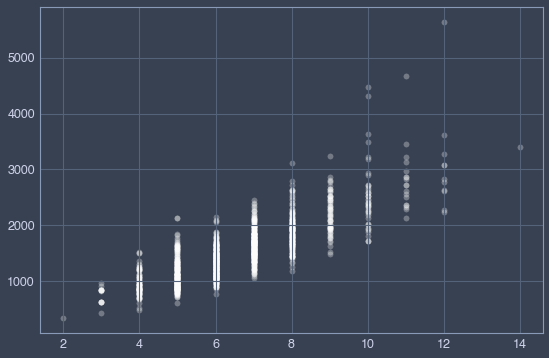

In [353]:
plt.figure(figsize=(9, 6))
#plt.scatter(df_3_n_scaled[:,11], df_3_n_scaled[:,4], alpha='0.3', color='white', cmap='viridis')
plt.scatter(df_3_n['TotRmsAbvGrd'], df_3_n['GrLivArea'], alpha='0.3', color='white', cmap='viridis')

In [354]:
# categorical variables
list(map(lambda x: df_3_c[x].value_counts(), df_3_c.columns[1:]))

[SBrkr    1335
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64, TA    735
 Gd    586
 Ex    100
 Fa     39
 Name: KitchenQual, dtype: int64, Typ     1360
 Min2      34
 Min1      31
 Mod       15
 Maj1      14
 Maj2       5
 Sev        1
 Name: Functional, dtype: int64, NA    690
 Gd    380
 TA    313
 Fa     33
 Ex     24
 Po     20
 Name: FireplaceQu, dtype: int64]

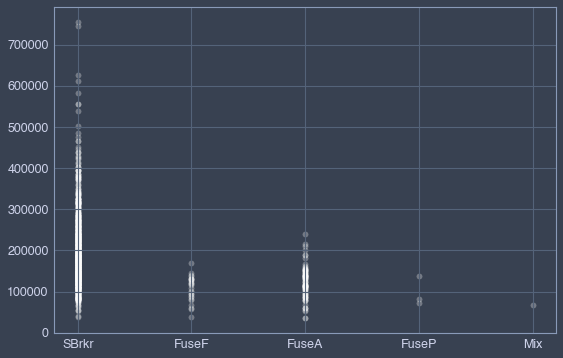

In [355]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['Electrical'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')

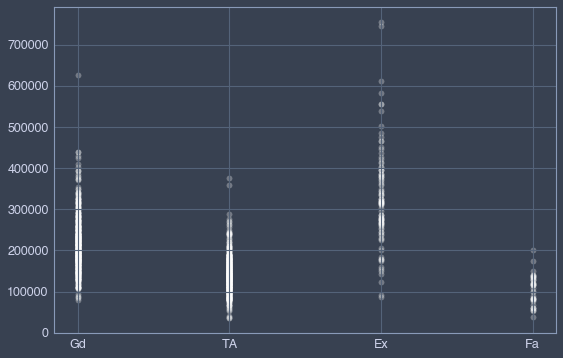

In [356]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['KitchenQual'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')

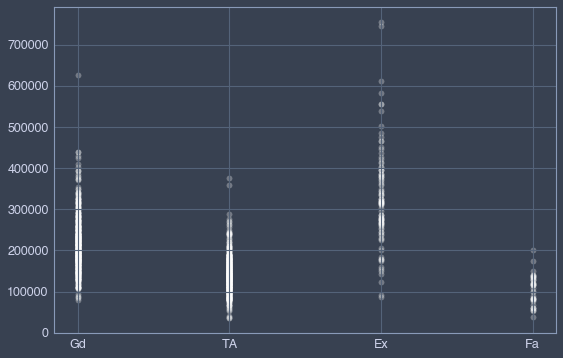

In [357]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['KitchenQual'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')

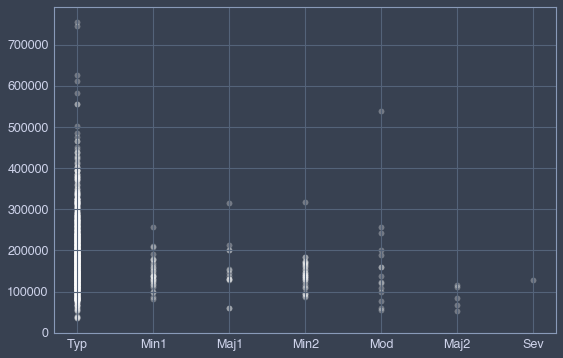

In [358]:
plt.figure(figsize=(9, 6))
plt.scatter(df_3_c['Functional'], df_3_c['SalePrice'], alpha='0.3', color='white', cmap='viridis')

In [359]:
# Convert string to numeric and merge some category because of small number
df_3_c['Electrical'] = df_3_c['Electrical'].apply(lambda x:0 if x=='FuseP' else 1 if x=='FuseF' else 2 if x=='FuseA' else 3 if x=='Mix' else 4)
df_3_c['KitchenQual'] = df_3_c['KitchenQual'].apply(lambda x:0 if x=='Po' else 1 if x=='Fa' else 2 if x=='TA' else 3 if x=='Gd' else 4)
df_3_c['FireplaceQu'] = df_3_c['FireplaceQu'].apply(lambda x:0 if x=='NA' else 1 if x=='Po' else 2 if x=='Fa' else 3 if x=='TA' else 4 if x=='Gd' else 5)
df_3_c['Functional'] = df_3_c['Functional'].apply(lambda x:0 if x=='Sal' else 1 if x=='Sev' else 2 if x=='Maj1' or x=='Maj2' else 3 if x=='Mod' else 4 if x=='Min1' or x=='Min2' else 5)

list(map(lambda x: df_3_c[x].value_counts(), df_3_c.columns[1:]))

[4    1335
 2      94
 1      27
 0       3
 3       1
 Name: Electrical, dtype: int64, 2    735
 3    586
 4    100
 1     39
 Name: KitchenQual, dtype: int64, 5    1360
 4      65
 2      19
 3      15
 1       1
 Name: Functional, dtype: int64, 0    690
 4    380
 3    313
 2     33
 5     24
 1     20
 Name: FireplaceQu, dtype: int64]

In [360]:
df_3_c.groupby('Electrical')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
Electrical,,,,,
3,67000,67000,67000.000000,67000,NaN
0,73000,137000,97333.333333,82000,34645.827070
1,39300,169500,107675.444444,115000,30636.507376
2,34900,239000,122196.893617,121250,37511.376615
4,37900,755000,186810.637453,170000,79828.273697


In [361]:
df_3_c.groupby('KitchenQual')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
KitchenQual,,,,,
1,39300,200000,105565.205128,115000,36004.254037
2,34900,375000,139962.511565,137000,38896.280336
3,79000,625000,212116.023891,201400,64020.176702
4,86000,755000,328554.670000,316750,120862.942573


In [362]:
df_3_c.groupby('Functional')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
Functional,,,,,
1,129000,129000,129000.000000,129000,NaN
2,52000,315000,136014.421053,130000,64176.181080
4,82000,316600,145263.569231,139900,39460.490952
3,55000,538000,168393.333333,137900,118938.666467
5,34900,755000,183429.147059,165500,80017.959658


In [363]:
df_3_c.groupby('FireplaceQu')['SalePrice'].agg(['min','max','mean','median','std']).sort_values('mean')

,min,max,mean,median,std
FireplaceQu,,,,,
1,60000,172000,129764.150000,131500,31080.842115
0,34900,342643,141331.482609,135000,44389.786884
2,117000,262000,167298.484848,158000,34287.717564
3,82500,745000,205723.488818,187500,71367.028772
4,90350,611657,226351.415789,206950,91123.148369
5,130500,755000,337712.500000,314250,123611.471764


In [364]:
#stats.chisquare(df_3_c.iloc[:,1:4],df_3_c.SalePrice)

In [365]:
df_3_c.columns[1:]

Index(['Electrical', 'KitchenQual', 'Functional', 'FireplaceQu'], dtype='object')

In [366]:
for i in df_3_c.columns[1:]:
    X = df_3_c.SalePrice
    Y = df_3_c[i]
    chi2 = stats.chi2_contingency(pd.crosstab(Y,X))
    print('** SalesPrice - ' + str(i) + ' **')
    print('chi^2 : ' + str(chi2[0]))
    print('p value : ' + str(chi2[1]))
    print('degree of freedom : ' + str(chi2[2]))
    print('')

** SalesPrice - Electrical **
chi^2 : 2766.812801319597
p value : 0.052835134010111195
degree of freedom : 2648

** SalesPrice - KitchenQual **
chi^2 : 2811.8004076403004
p value : 1.282074499167363e-31
degree of freedom : 1986

** SalesPrice - Functional **
chi^2 : 1990.212926514667
p value : 1.0
degree of freedom : 2648

** SalesPrice - FireplaceQu **
chi^2 : 3763.8996461233037
p value : 4.387723294930742e-08
degree of freedom : 3310



In [322]:
#chi2 = stats.chi2_contingency(df_3_c.SalePrice, df_3_c.iloc[:,1:])


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
chi2 = stats.chi2_contingency(df_3_c.SalePrice, df_3_c.iloc[:,1:])
chi2